In [2]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
data =  pd.read_csv("world_risk_index.csv")

In [3]:
data.head()

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High


In [4]:
len(data['Year'].unique()),np.sort(data['Year'].unique()),len(data['Region'].unique())

(11,
 array([2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021],
       dtype=int64),
 306)

In [5]:
data.isna().sum().sum()

6

### Observation 1 : 
1. There are 306 regions given in the dataset but there are 195 countries, hence the regions are not divided country wise.
2. Data is given for 11 years starting from 2011 to 2021
3. We have 6 missing values

## Data Cleaning : 

In [6]:
def summary(col1,col2,year):
    pivot = pd.pivot_table(data, values=[col1], index=['Year',col2],
                    aggfunc={col1: [min, max, np.mean,np.std]})
    pivot = pivot.sort_values(by=(col1,'mean')).reindex(np.sort(data['Year'].unique()), level=0)

    return pivot.loc[year,:]
def pivot(col1,col2):
    pivot = pd.pivot_table(data, values=[col1], index=[col2,'Year'],
                    aggfunc={col1: [min, max, np.mean,np.std]})
    pivot = pivot.sort_values(by=(col1,'mean')).reindex(np.sort(data['Year'].unique()), level=1)
    pivot = pivot.reset_index()
    return pivot



In [7]:
data.isna().sum().sum()

6

In [8]:
data[pd.isnull(data).any(axis=1)]

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
1193,Österreich,2.87,13.18,21.75,13.63,39.27,12.34,2019,Medium,Very Low,NaN,Very Low
1202,Deutschland,2.43,11.51,21.11,14.30,36.44,12.60,2019,Low,Very Low,NaN,Very Low
1205,Norwegen,2.34,10.60,22.06,13.29,39.21,13.68,2019,Low,Very Low,NaN,Very Low
1292,Föd. Staaten v. Mikronesien,7.59,14.95,50.77,31.79,72.13,48.39,2020,High,NaN,High,High
1858,Korea Republic of 4.59,14.89,30.82,14.31,46.55,31.59,NaN,2016,Very High,Very High,NaN,High


In [9]:
summary('WRI','WRI Category',2020)


WRI                            
                max       mean    min       std
WRI Category                                   
Very Low       3.14   2.306389   0.31  0.763594
Low            5.66   4.322500   3.30  0.687249
Medium         7.57   6.452500   5.68  0.631042
High          10.51   8.959714   7.71  0.927141
Very High     49.74  17.201081  10.76  7.521631

In [10]:
summary('Vulnerability','Vulnerability Category',2019)

Vulnerability                            
                                 max       mean    min       std
Vulnerability Category                                          
Very Low                       33.01  27.652424  22.49  3.272200
Low                            41.98  37.853333  33.10  2.527202
Medium                         47.86  45.312222  42.18  1.762471
High                           61.74  54.547222  47.98  4.089707
Very High                      76.13  67.290833  61.99  3.636074

In [11]:
summary('Vulnerability','Vulnerability Category',2016)

Vulnerability                            
                                 max       mean    min       std
Vulnerability Category                                          
Very Low                       34.40  29.403529  24.79  2.815579
Low                            43.11  39.324118  35.10  2.610859
Medium                         49.72  46.699412  43.40  2.014562
High                           62.58  56.170000  50.57  3.780539
Very High                      74.80  67.339118  63.01  3.322840

In [12]:
data.loc[1292,'WRI Category'] = 'Medium'
data.loc[1193,'Vulnerability Category'] = 'Very Low'
data.loc[1202,'Vulnerability Category'] = 'Very Low'
data.loc[1205,'Vulnerability Category'] = 'Very Low'
data.loc[1858,'Vulnerability Category'] = 'Very Low'
data.loc[1858,' Lack of Adaptive Capacities']=np.mean(data[' Lack of Adaptive Capacities'])

In [13]:
data['Year']= data['Year'].astype('str')

## Data Analysis


In [14]:
data

,Region,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities,Year,Exposure Category,WRI Category,Vulnerability Category,Susceptibility Category
0,Vanuatu,32.00,56.33,56.81,37.14,79.34,53.96,2011,Very High,Very High,High,High
1,Tonga,29.08,56.04,51.90,28.94,81.80,44.97,2011,Very High,Very High,Medium,Medium
2,Philippinen,24.32,45.09,53.93,34.99,82.78,44.01,2011,Very High,Very High,High,High
3,Salomonen,23.51,36.40,64.60,44.11,85.95,63.74,2011,Very High,Very High,Very High,High
4,Guatemala,20.88,38.42,54.35,35.36,77.83,49.87,2011,Very High,Very High,High,High
...,...,...,...,...,...,...,...,...,...,...,...,...
1912,Grenada,1.42,3.13,45.39,24.54,68.82,42.82,2016,Very Low,Very Low,Medium,Medium
1913,Barbados,1.32,3.46,38.26,18.20,50.29,46.29,2016,Very Low,Very Low,Low,Low
1914,Saudi Arabia,1.14,2.93,38.96,14.80,65.01,37.07,2016,Very Low,Very Low,Low,Very Low
1915,Malta,0.60,1.65,36.25,15.97,59.33,33.44,2016,Very Low,Very Low,Low,Very Low


## Questions at first glance :
1. Which region has WRI highest and lowest year wise ?
2. Does Lack of Coping Capabilities	& Lack of Adaptive Capacities make a region more risky? what is the influence factor?
3. On average what is the range value for each category? For eg, what is minimum, maimum, mean and standard deviation for Very Low, Medium, etc? Does this change over the years?
4. Does  Lack of Coping Capabilities & Lack of Adaptive Capacities change over the years?

### Univariate Analysis

In [15]:
def top10(year):
    return data[data['Year']==year].sort_values(by='WRI')[::-1].head(10)
def bottom10(year):
    return data[data['Year']==year].sort_values(by='WRI').head(10)

In [16]:
years= np.sort(data['Year'].unique())[::-1]


#### Top 10 countries wrt WRI over the years

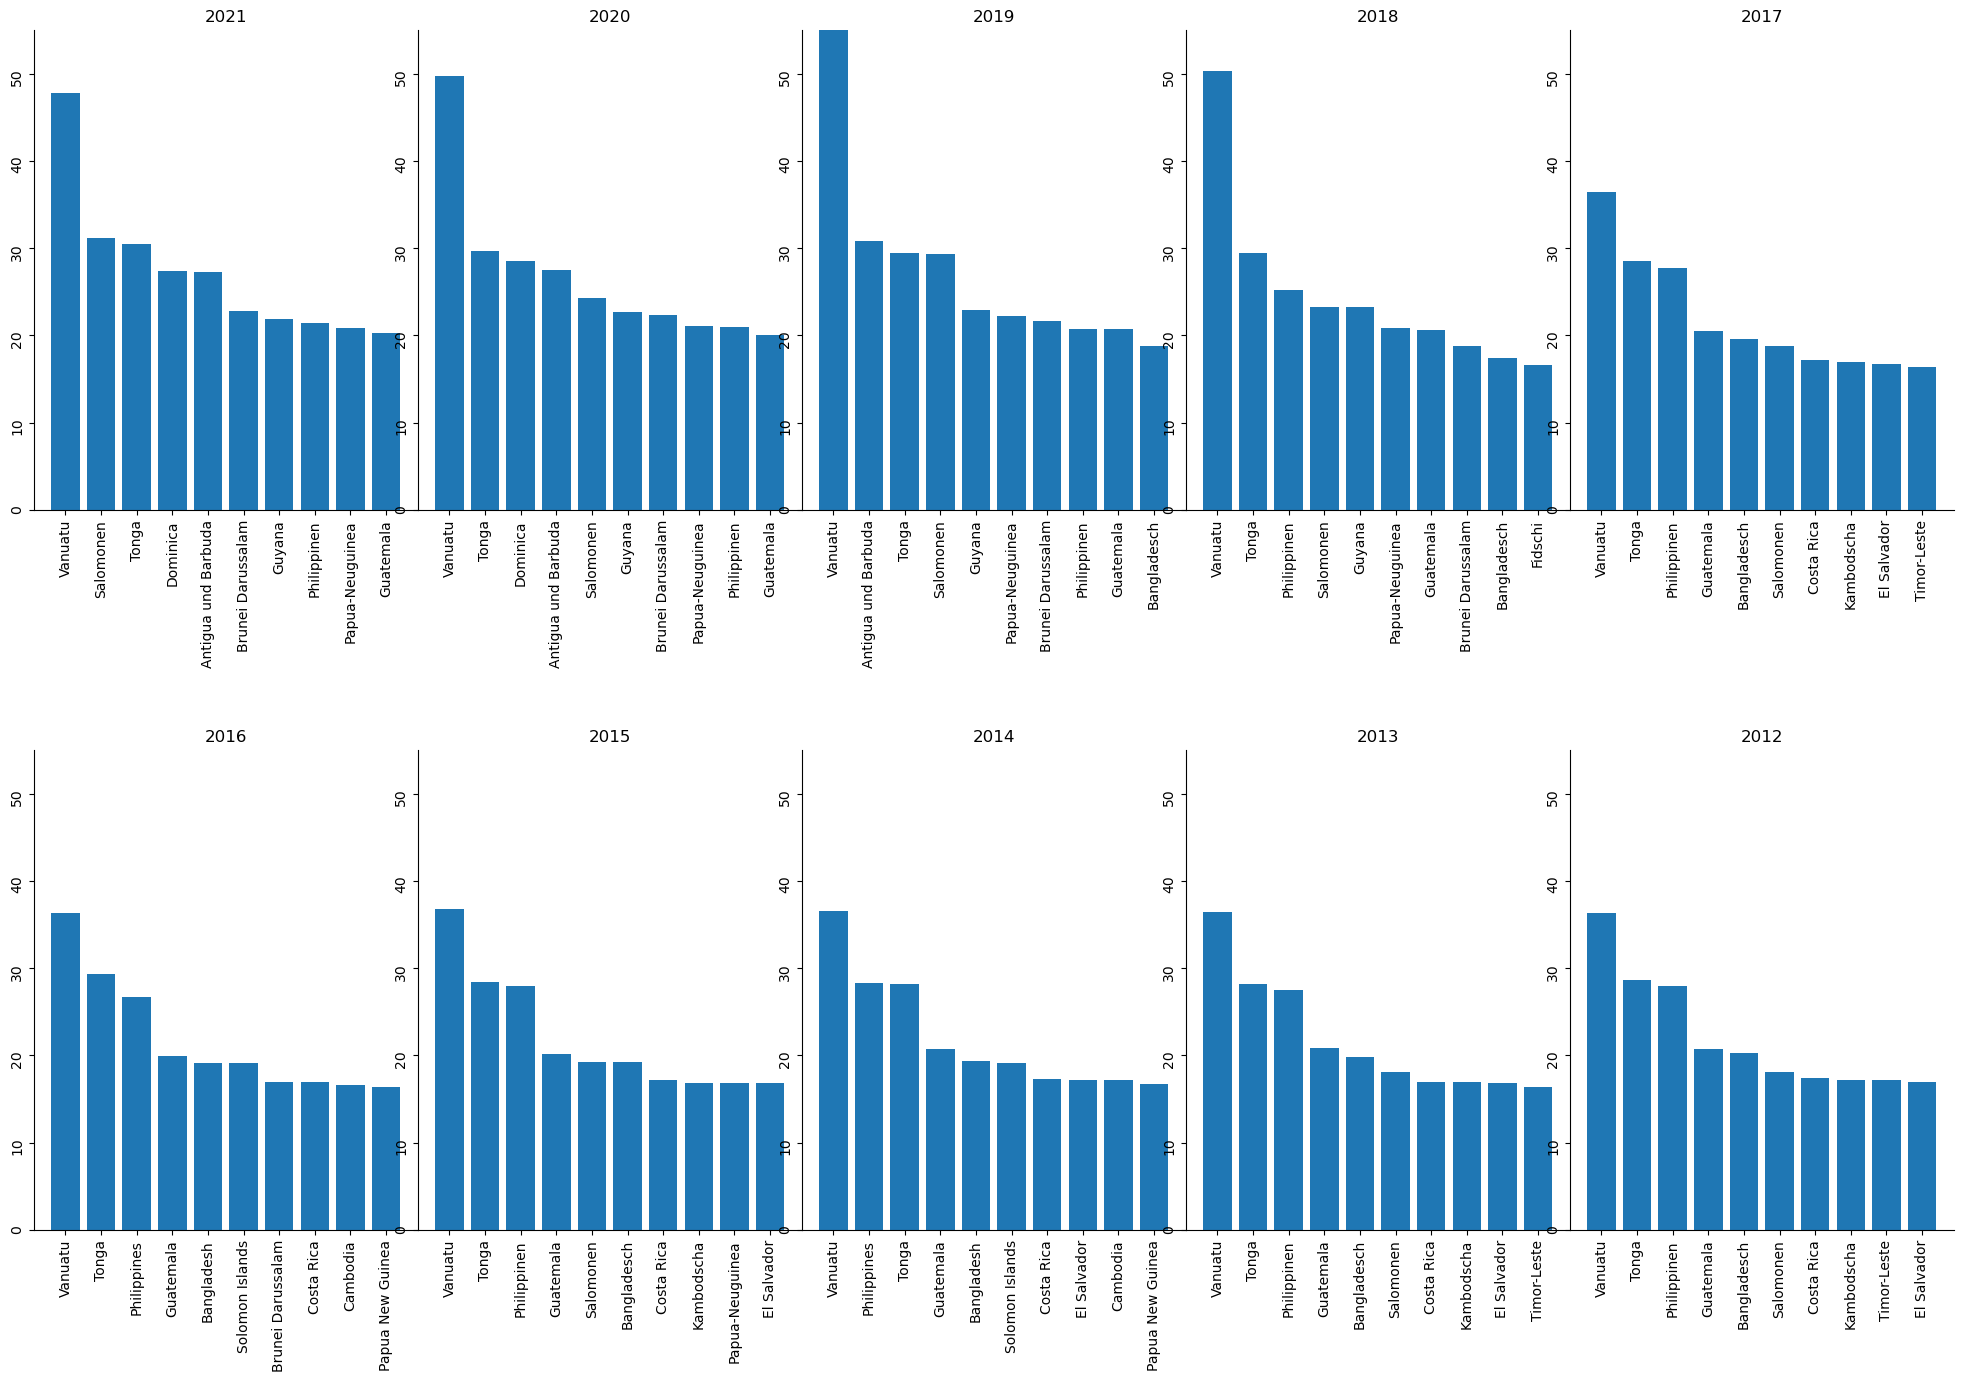

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(24, 12))
plt.subplots_adjust(left=0.2, bottom=0, right=1, top=1, wspace=0, hspace=0.5)

for ax,i in zip(axs.ravel(),years):
    ax.bar(top10(i)['Region'],top10(i)['WRI'],)
    ax.set_title(i)
    ax.tick_params(labelrotation=90)
    ax.set_ylim([0,55])
    sns.despine()

plt.show()

#### Bottom 10 countries wrt WRI over the years

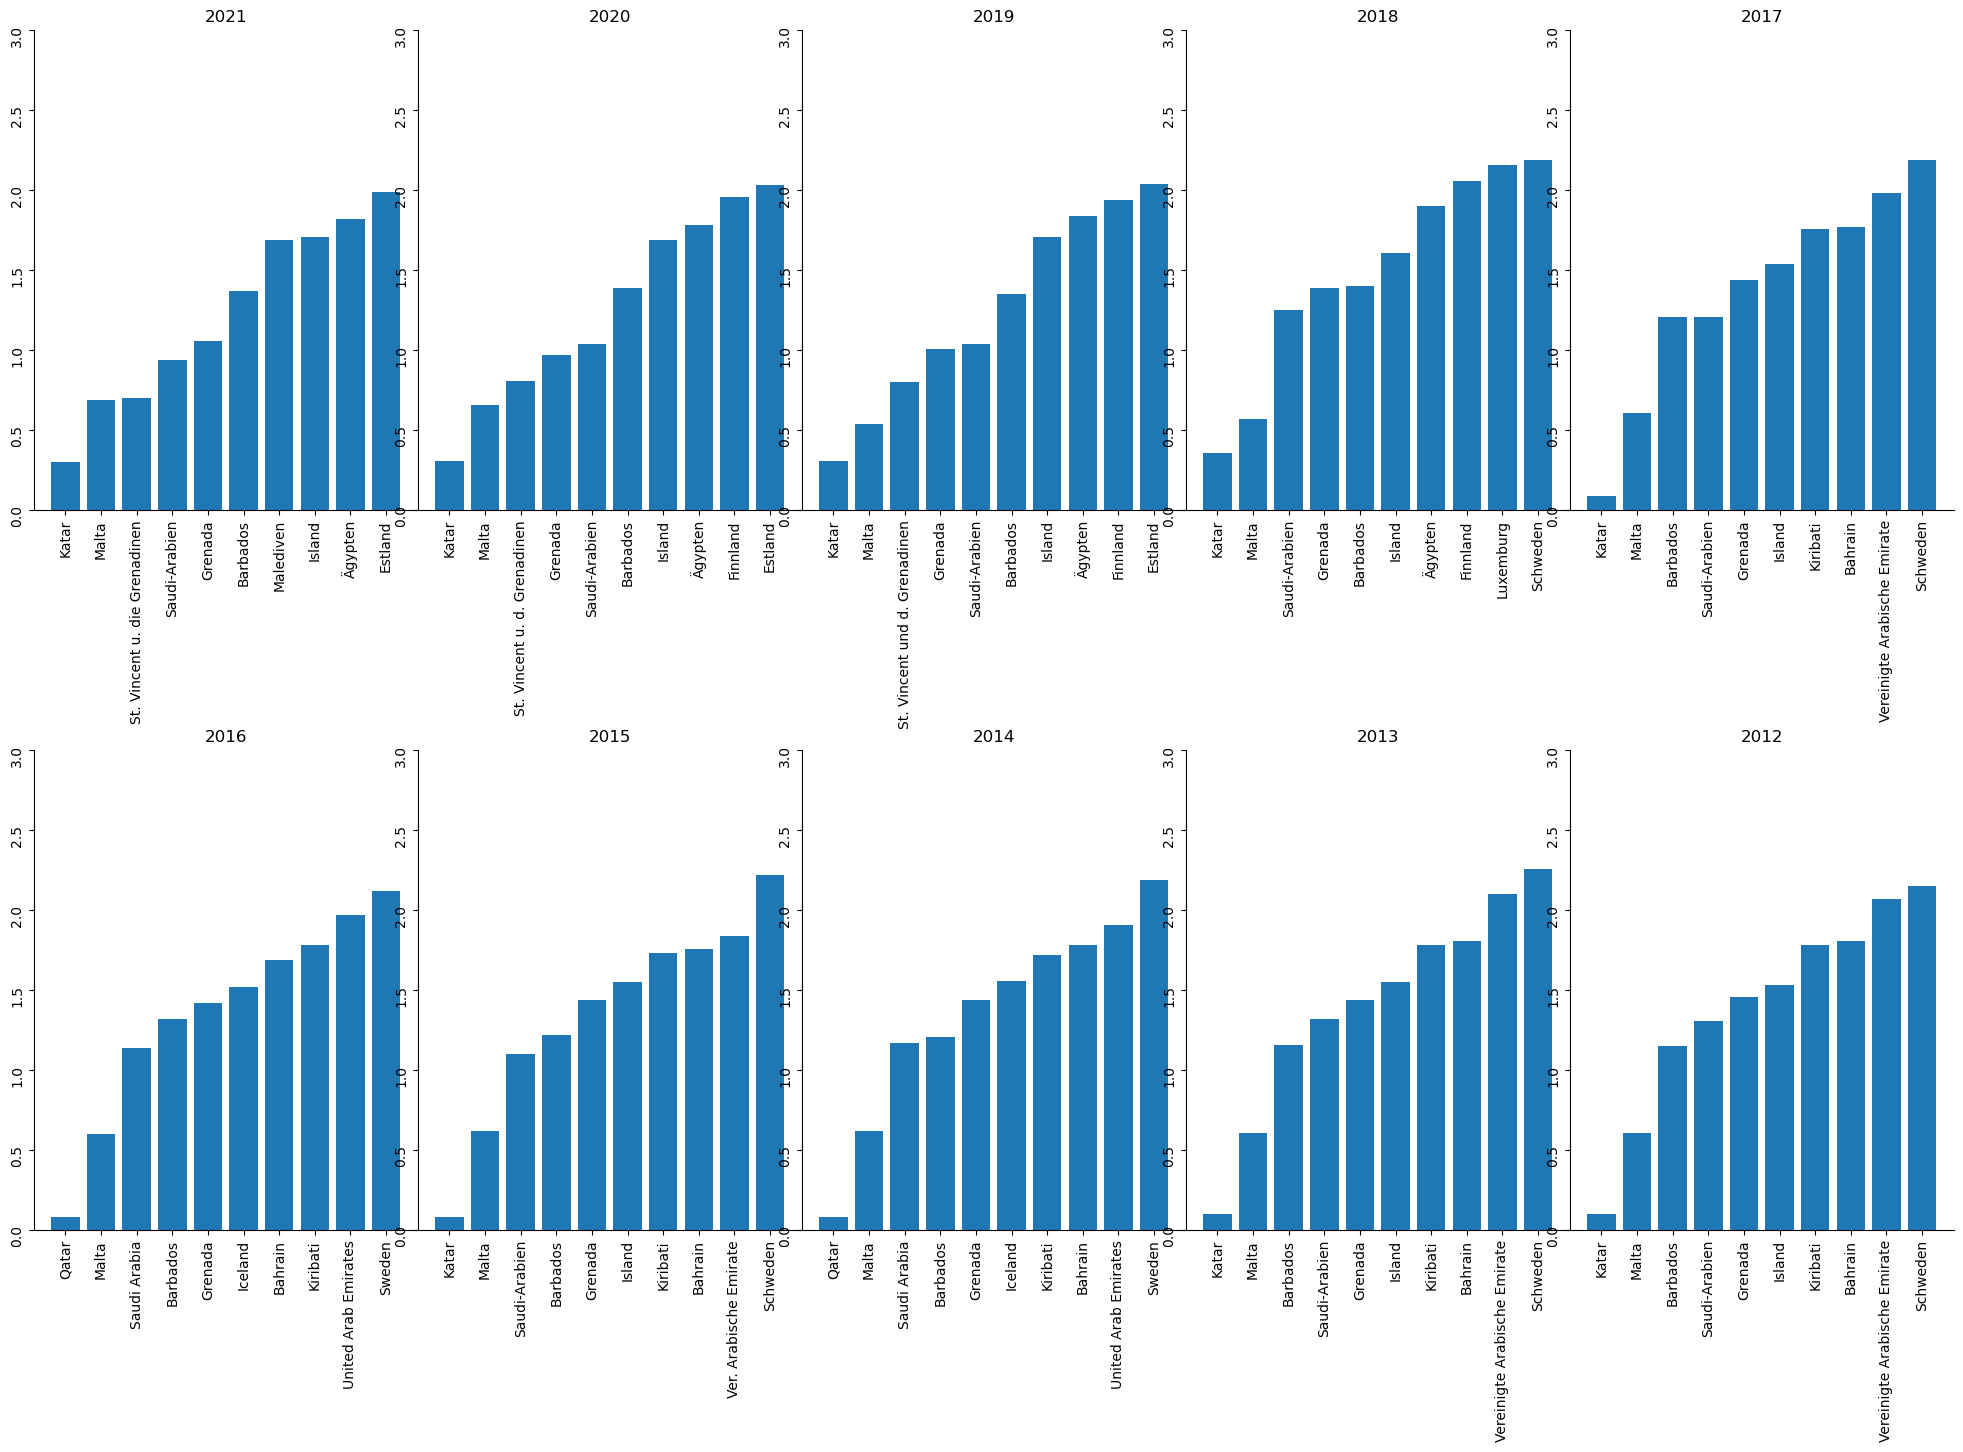

In [18]:
fig, axs = plt.subplots(nrows=2, ncols=5, figsize=(24, 12))
plt.subplots_adjust(left=0.2, bottom=0, right=1, top=1, wspace=0, hspace=0.5)
for ax,i in zip(axs.ravel(),years):
    ax.bar(bottom10(i)['Region'],bottom10(i)['WRI'],)
    ax.set_title(i)
    ax.tick_params(labelrotation=90)
    ax.set_ylim([0,3])
    sns.despine()
plt.show()

In [19]:
data.describe()

,WRI,Exposure,Vulnerability,Susceptibility,Lack of Coping Capabilities,Lack of Adaptive Capacities
count,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000,1917.000000
mean,7.551763,15.388336,48.075759,30.739431,70.438289,43.090511
std,5.553257,10.240135,13.835666,15.667030,15.038854,13.547619
min,0.020000,0.050000,14.310000,8.260000,31.590000,11.160000
25%,3.740000,10.160000,37.040000,17.790000,59.330000,33.200000
50%,6.520000,12.760000,47.100000,25.400000,74.230000,43.090000
75%,9.400000,16.450000,60.060000,42.640000,83.000000,53.060000
max,56.710000,99.880000,76.470000,70.830000,94.360000,76.110000


#### KDE plots
##### Always use arviz instead of seaborn, seaborn given minutely wrong p(x) due to smoothening

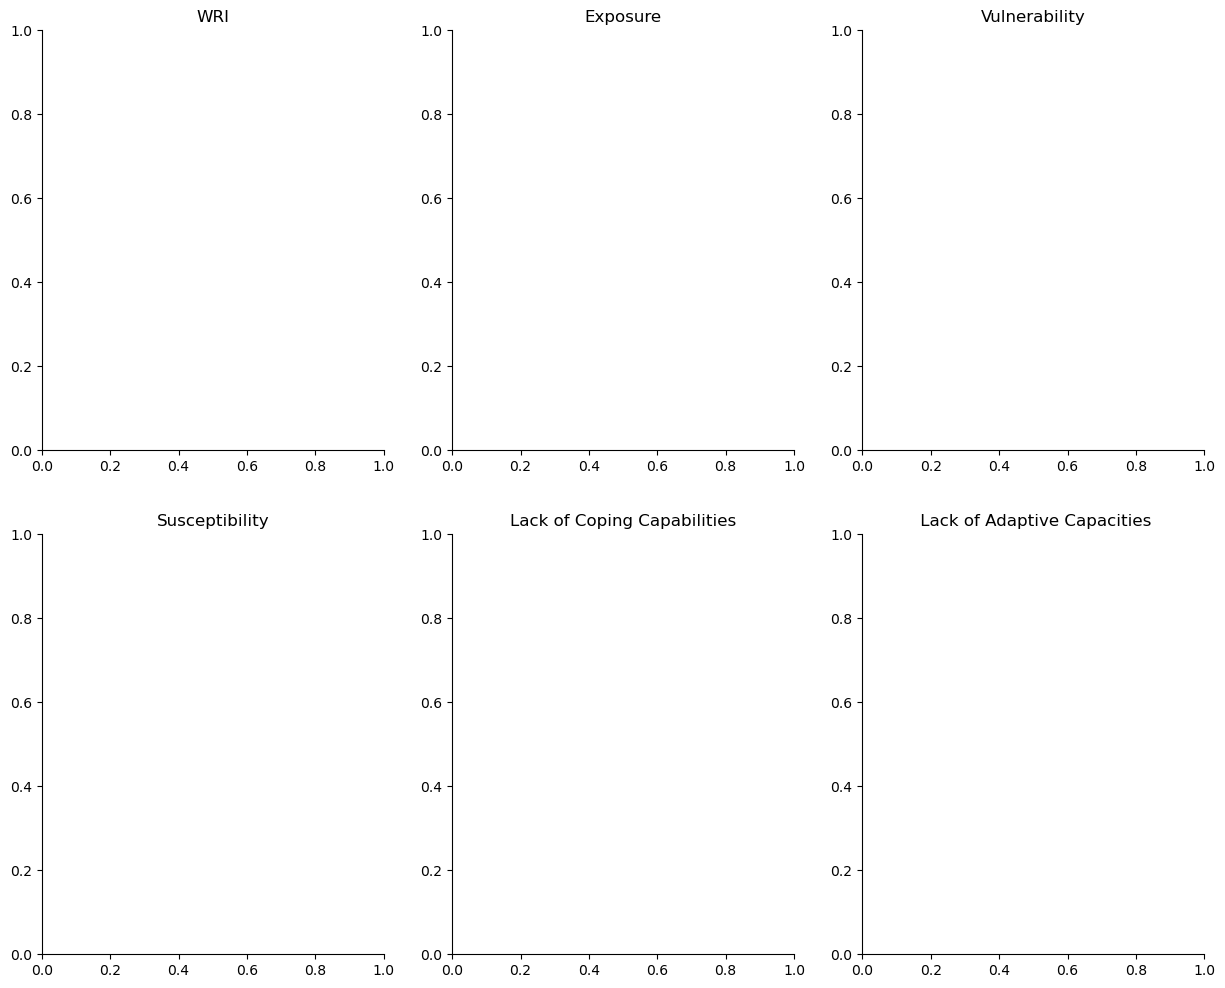

In [21]:
ys = ['WRI','Exposure','Vulnerability','Susceptibility','Lack of Coping Capabilities',' Lack of Adaptive Capacities']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
for ax,i in zip(axs.ravel(),ys):
    ax.set_title(i)
    sns.despine()
plt.show()


#### Boxplots

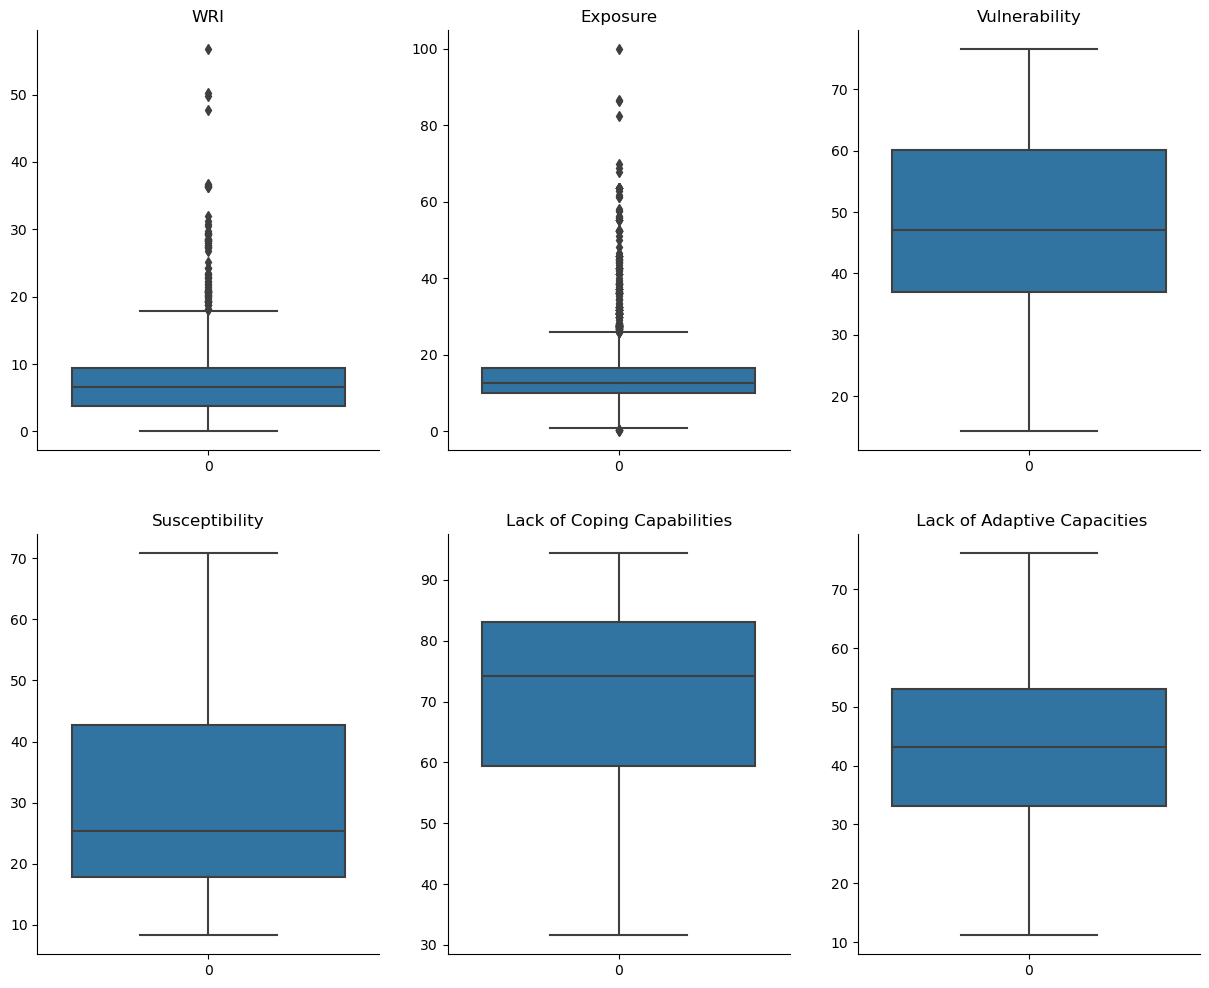

In [22]:
import warnings
warnings.filterwarnings("ignore")
ys = ['WRI','Exposure','Vulnerability','Susceptibility','Lack of Coping Capabilities',' Lack of Adaptive Capacities']
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 12))
for ax,i in zip(axs.ravel(),ys):
    sns.boxplot(data[i],ax=ax)
    ax.set_title(i)
    sns.despine()
plt.show()


## Bivariate Analysis

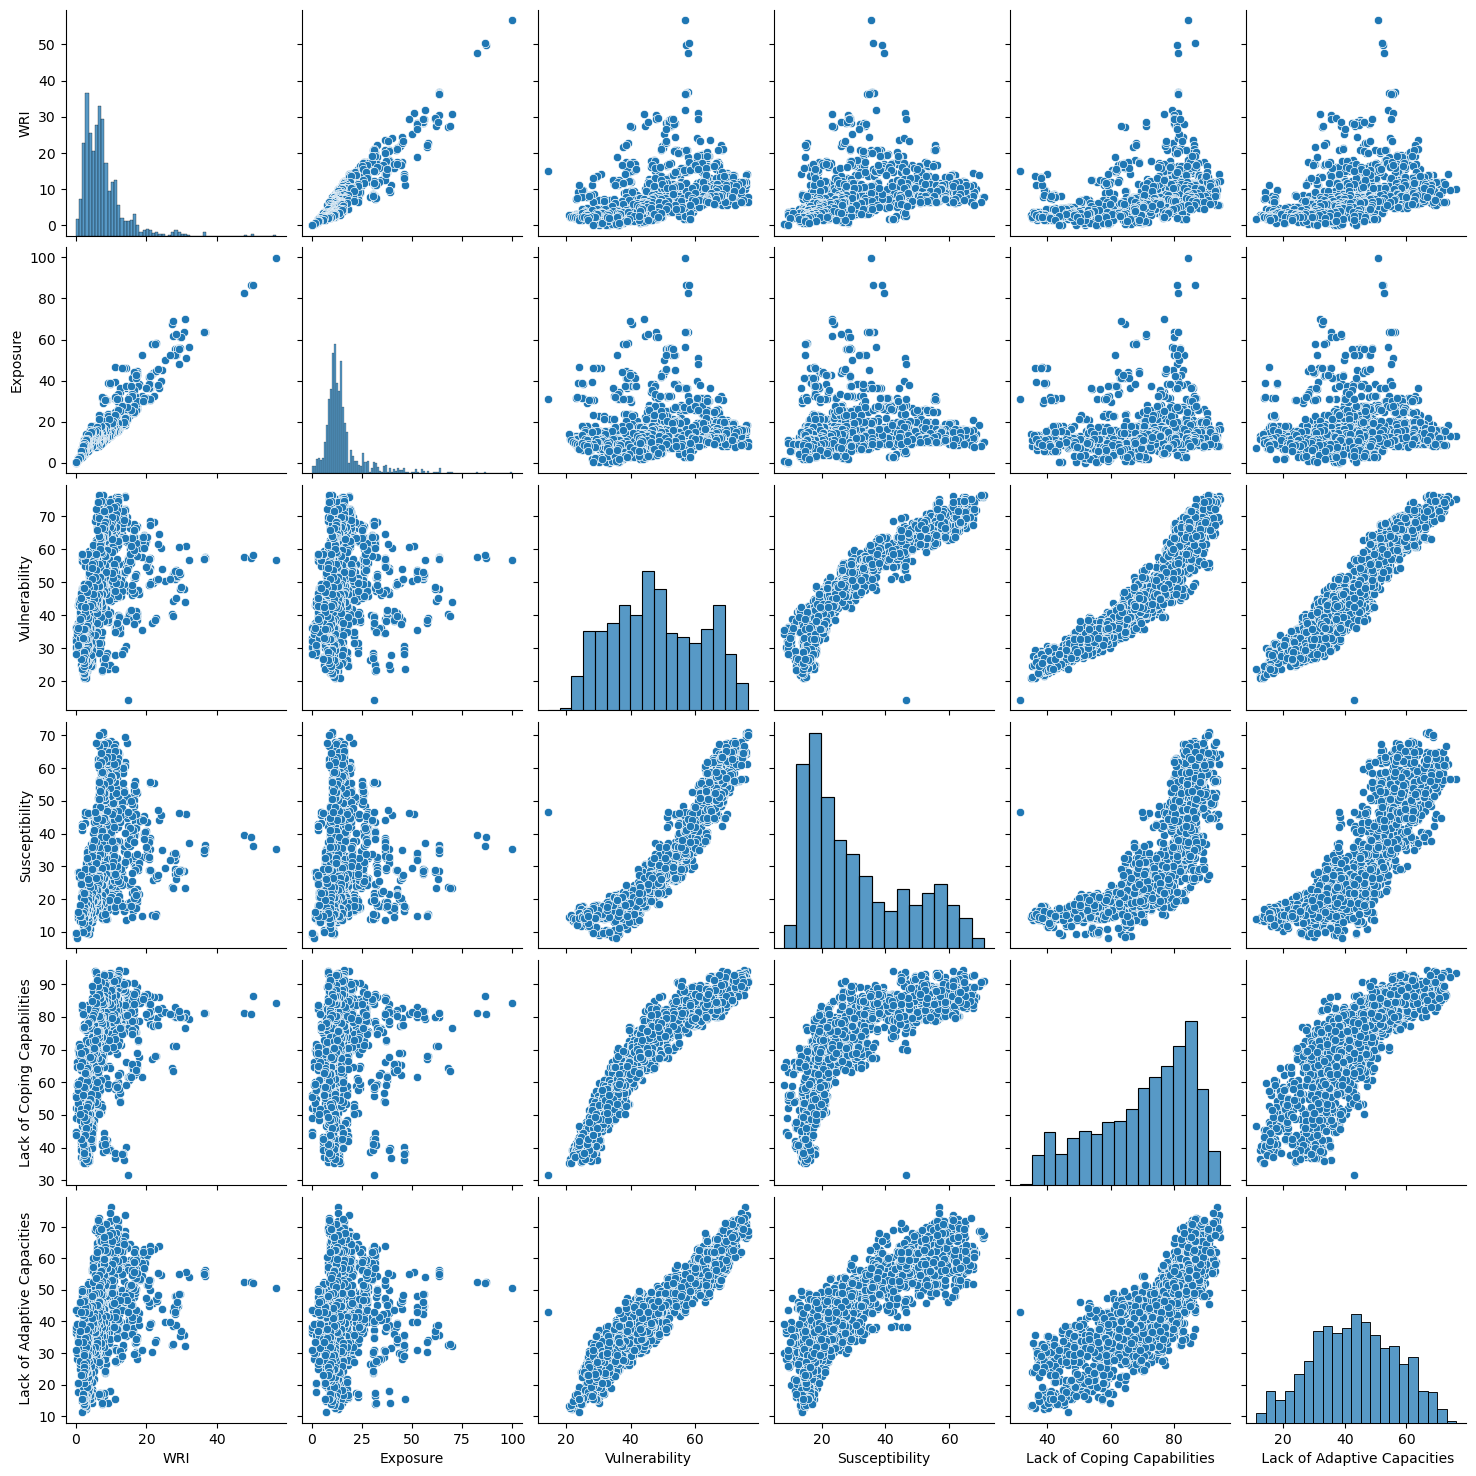

In [28]:
sns.pairplot(data=data)

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


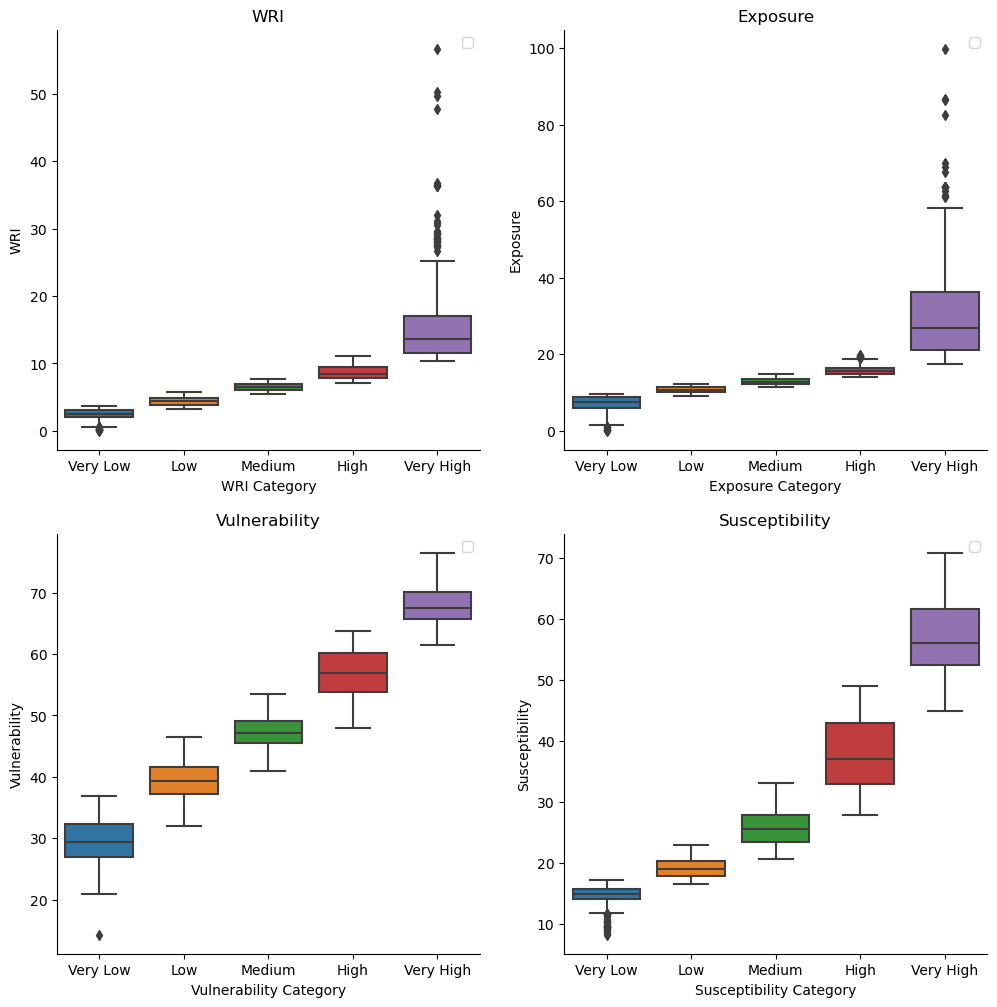

In [24]:
ys = ['WRI','Exposure','Vulnerability','Susceptibility']
fig, ((a,b),(c,d)) = plt.subplots (2, 2, figsize=(12, 12))
for i,t in zip(ys,[a,b,c,d]):
    sns.boxplot(x=i+' Category', y=i,data=data.sort_values(by=i), ax = t)
    t.legend(ncol=3)
    t.set_title(i)
sns.despine()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


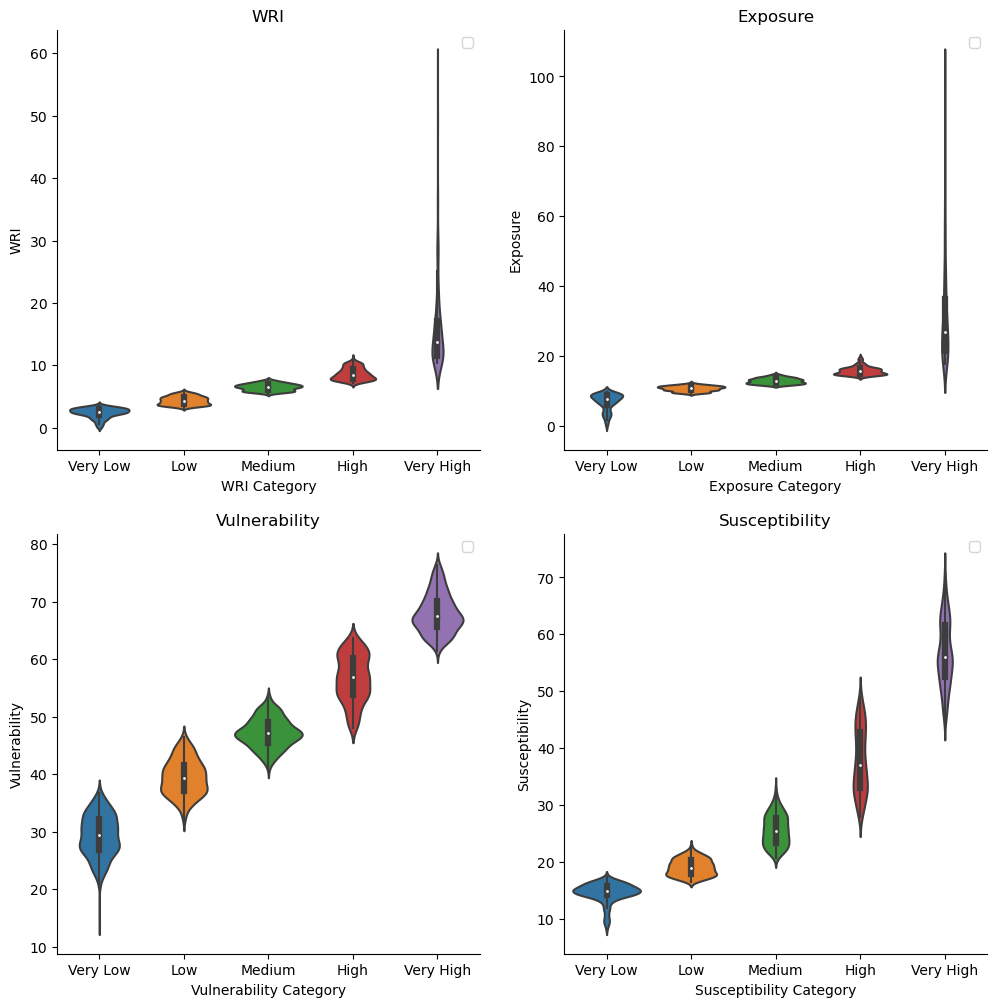

In [25]:
ys = ['WRI','Exposure','Vulnerability','Susceptibility']
fig, ((a,b),(c,d)) = plt.subplots (2, 2, figsize=(12, 12))
for i,t in zip(ys,[a,b,c,d]):
    sns.violinplot(x=i+' Category', y=i,data=data.sort_values(by=i), ax = t)
    t.legend(ncol=3)
    t.set_title(i)
sns.despine()


## Trivariate Analysis



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


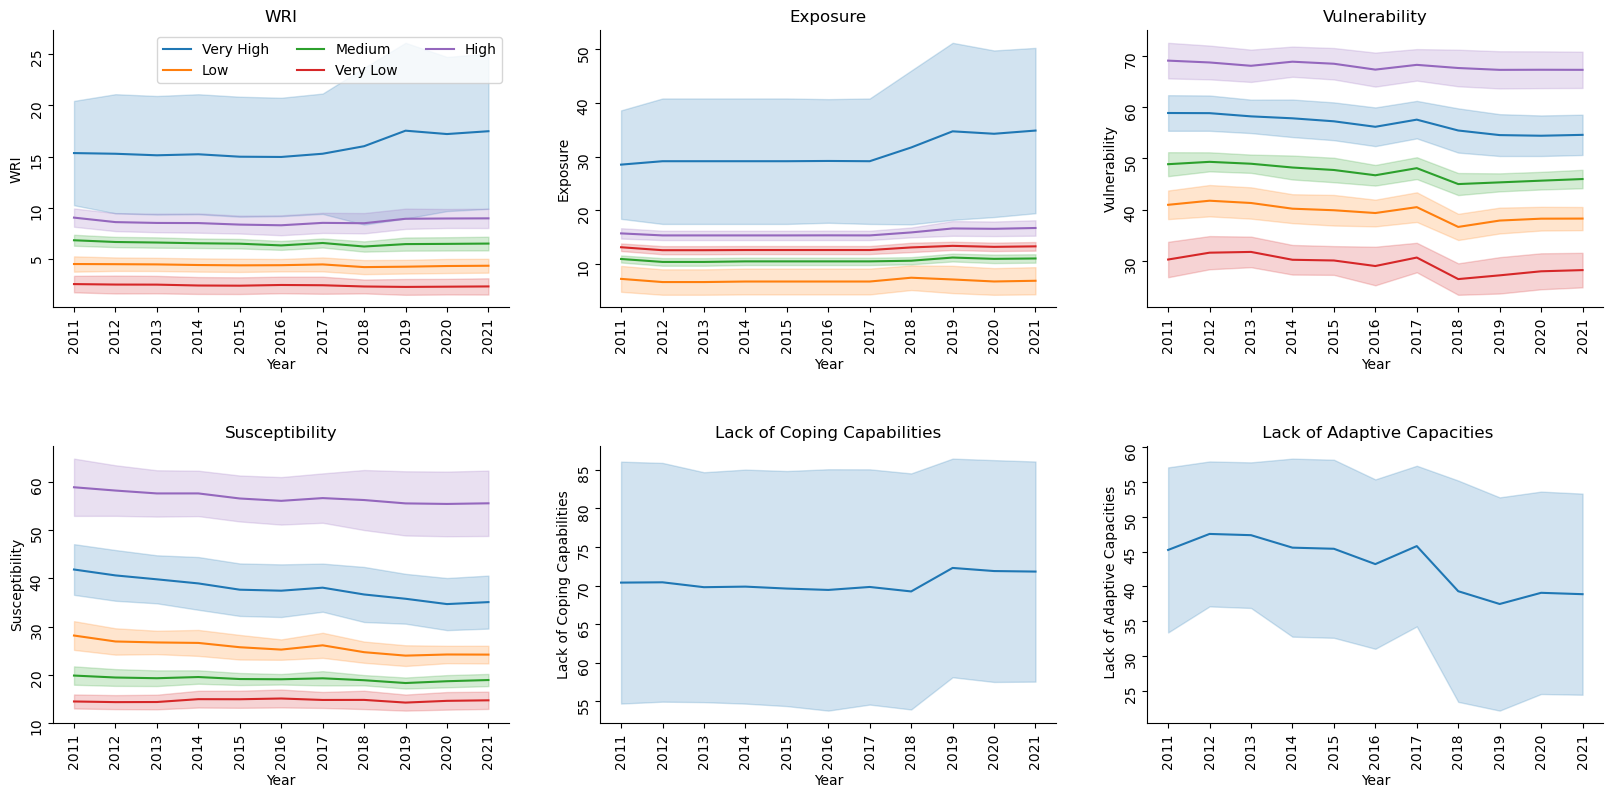

In [26]:
col = ['WRI','Exposure','Vulnerability','Susceptibility','Lack of Coping Capabilities',' Lack of Adaptive Capacities']
col_hue = ['WRI Category','Exposure Category','Vulnerability Category','Susceptibility Category',None,None]
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(20, 9))
plt.subplots_adjust(hspace=0.5)
for ax,i,j in zip(axs.ravel(),col,col_hue):
    sns.lineplot(data=data.sort_values(by='Year'), x="Year", y=i, hue=j,markers=True,dashes=True,ci='sd',ax=ax)
    ax.set_title(i)
    ax.tick_params(labelrotation=90)
    sns.despine()
    if(i!='WRI'):
        ax.legend().set_visible(False)
    else:
        ax.legend(ncol=3)
sns.despine()

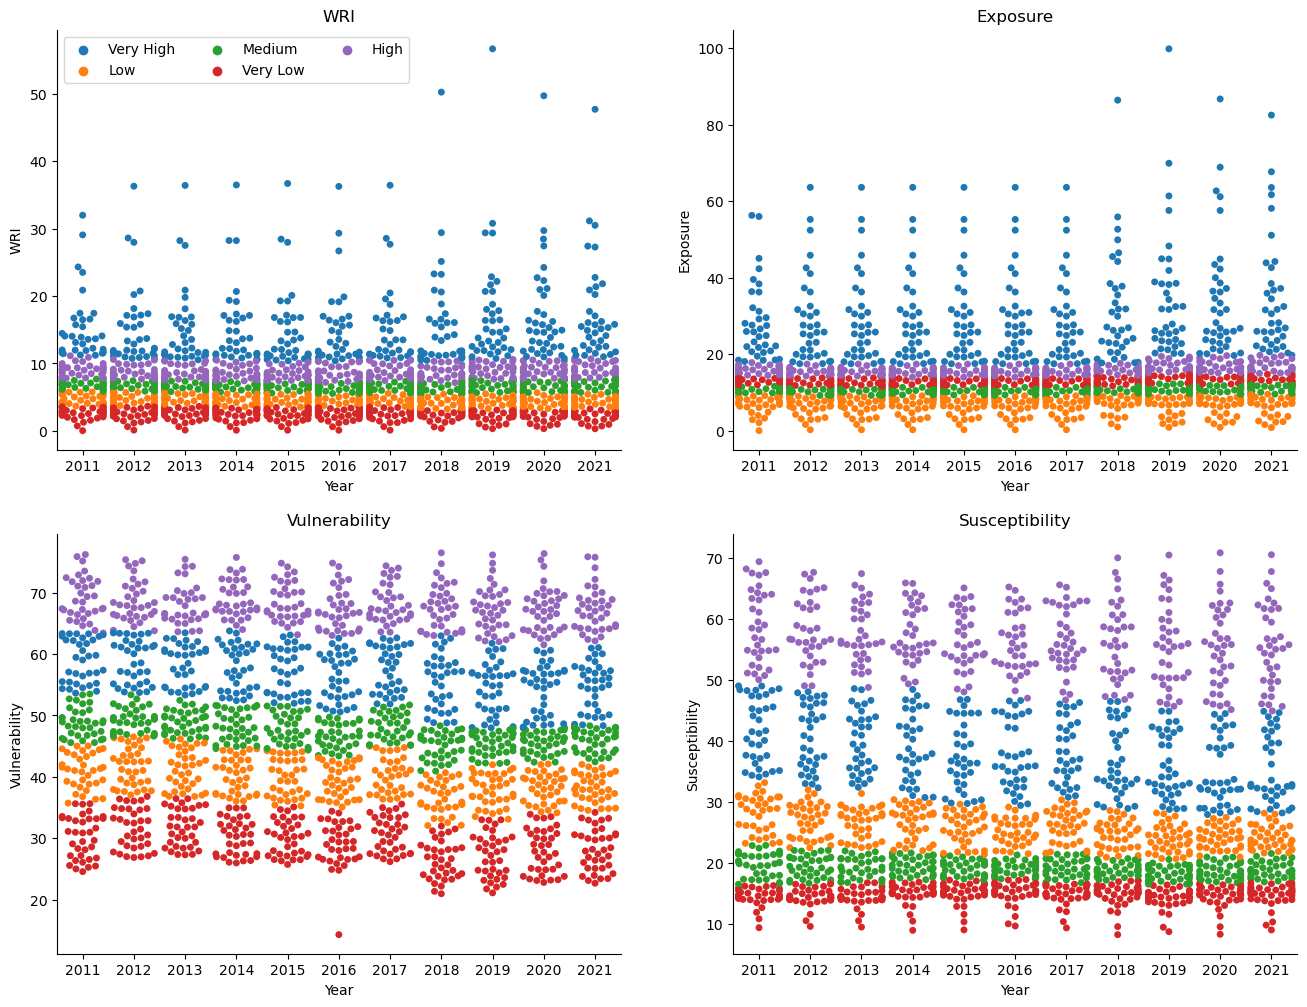

In [27]:
ys = ['WRI','Exposure','Vulnerability','Susceptibility']
fig, ((a,b),(c,d)) = plt.subplots (2, 2, figsize=(16, 12))
for i,t in zip(ys,[a,b,c,d]):
    sns.swarmplot(x='Year', y=i, hue=i+' Category',data=data.sort_values(by='Year'), ax = t)
    if(i=='WRI'):
        t.legend(ncol=3)
    else:
        t.legend().set_visible(False)
    t.set_title(i)
sns.despine()
